<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/newton_diffs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
%matplotlib inline

x = np.array([-1, 0, 1, 2]) # x coordinates in space
y = np.array([1, 1, 2, 0]) # f(x)

def getNDDCoeffs(x, y):
    """ Creates NDD pyramid and extracts coeffs """
    n = np.shape(y)[0]
    pyramid = np.zeros([n, n]) # Create a square matrix to hold pyramid
    pyramid[::,0] = y # first column is y
    for j in range(1,n):
        for i in range(n-j):
            # create pyramid by updating other columns
            pyramid[i][j] = (pyramid[i+1][j-1] - pyramid[i][j-1]) / (x[i+j] - x[i])
    return pyramid[0] # return first row

coeff_vector = getNDDCoeffs(x, y)
print (coeff_vector)

[ 1.          0.          0.5        -0.66666667]


In [0]:
# create as many polynomials as size of coeff_vector
final_pol = np.polynomial.Polynomial([0.]) # our target polynomial
n = coeff_vector.shape[0] # get number of coeffs
for i in range(n):
    p = np.polynomial.Polynomial([1.]) # create a dummy polynomial
    for j in range(i):
        # each vector has degree of i
        # their terms are dependant on 'x' values
        p_temp = np.polynomial.Polynomial([-x[j], 1.]) # (x - x_j)
        p = np.polymul(p, p_temp) # multiply dummy with expression
    p *= coeff_vector[i] # apply coefficient
    final_pol = np.polyadd(final_pol, p) # add to target polynomial

p = np.flip(final_pol[0].coef, axis=0)
print(p)

[-0.66666667  0.5         1.16666667  1.        ]


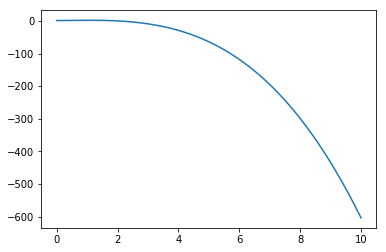

In [0]:
# Evaluate polynomial at X axis and plot result
import matplotlib.pyplot as plt
x_axis = np.linspace(0, 10, num=5000)
y_axis = np.polyval(p, x_axis)

plt.plot(x_axis, y_axis)
plt.show()